Tarea 1 Data Analysis And Machine Learning

Gustavo Ignacio Lara Urrutia - 2021421301

- Date: data medida en frecuencia diaria
- Location: ubicacion del medidor
- Min_Temp: temperatura minima observada
- Max_Temp: temperatura maxima observada
- Leakage: Filtracion medida en el area
- Evaporation: Tasa de evaporacion
- Electricity: Consumo electrico KW
- Parameter#: Diferentes sensores de reportando direccion y velocidad de viento en distintos momentos del dia, asi como otras metricas relevantes.
- Failure today: El sensor reporta fallo (o no)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

1. Cargar la base de datos en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

In [ ]:
df = pd.read_csv('../data/machine_failure_data.csv')
df.head


<bound method NDFrame.head of              Date  Location  Min_Temp  Max_Temp  Leakage  Evaporation  \
0       12/1/2008         3      13.4      22.9      0.6          NaN   
1       12/2/2008         3       7.4      25.1      0.0          NaN   
2       12/3/2008         3      12.9      25.7      0.0          NaN   
3       12/4/2008         3       9.2      28.0      0.0          NaN   
4       12/5/2008         3      17.5      32.3      1.0          NaN   
...           ...       ...       ...       ...      ...          ...   
142188  6/20/2017        42       3.5      21.8      0.0          NaN   
142189  6/21/2017        42       2.8      23.4      0.0          NaN   
142190  6/22/2017        42       3.6      25.3      0.0          NaN   
142191  6/23/2017        42       5.4      26.9      0.0          NaN   
142192  6/24/2017        42       7.8      27.0      0.0          NaN   

        Electricity Parameter1_Dir  Parameter1_Speed Parameter2_9am  ...  \
0               N

In [6]:
df.describe(include='all')

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
count,142193,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787
unique,3436,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,12/1/2013,NaN,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,49,NaN,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332
mean,NaN,24.740655,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN
std,NaN,14.237503,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN
min,NaN,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN
25%,NaN,12.000000,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN
50%,NaN,25.000000,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN
75%,NaN,37.000000,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN


In [7]:
df.dtypes

Date                 object
Location              int64
Min_Temp            float64
Max_Temp            float64
Leakage             float64
Evaporation         float64
Electricity         float64
Parameter1_Dir       object
Parameter1_Speed    float64
Parameter2_9am       object
Parameter2_3pm       object
Parameter3_9am      float64
Parameter3_3pm      float64
Parameter4_9am      float64
Parameter4_3pm      float64
Parameter5_9am      float64
Parameter5_3pm      float64
Parameter6_9am      float64
Parameter6_3pm      float64
Parameter7_9am      float64
Parameter7_3pm      float64
Failure_today        object
dtype: object

A continuación, se agregan variables categóricas para las direcciones del viento y dummy para Leakage y Failure.

In [ ]:
VIENTO = list(range(1, 17))
DIRECV = ['SSW','S', 'NNE' ,'WNW', 'N' ,'SE', 'ENE', 'NE' ,'E' ,'SW', 'W', 'WSW', 'NNW', 'ESE','SSE','NW']
df['VIENTO'] = df['Parameter1_Dir'].replace(DIRECV,VIENTO)

df['VIENTO2_9am'] = df['Parameter2_9am'].replace(DIRECV,VIENTO)

df['VIENTO3_2pm'] = df['Parameter2_3pm'].replace(DIRECV,VIENTO)




In [9]:
df['VIENTO'].head


<bound method NDFrame.head of 0         11.0
1          4.0
2         12.0
3          8.0
4         11.0
          ... 
142188     9.0
142189     9.0
142190    13.0
142191     5.0
142192     6.0
Name: VIENTO, Length: 142193, dtype: float64>

In [10]:
df['VIENTO2_9am'].head

<bound method NDFrame.head of 0         11.0
1         13.0
2         11.0
3          6.0
4          7.0
          ... 
142188    14.0
142189     6.0
142190     6.0
142191     6.0
142192    15.0
Name: VIENTO2_9am, Length: 142193, dtype: float64>

In [ ]:
df['VIENTO3_2pm'].head

In [64]:
df['Failure_today'] = df['Failure_today'].str.strip().str.lower()

df['Failure_today'] = df['Failure_today'].map({'yes': 1, 'no': 0})

In [12]:
df['Failure_today'].head


<bound method NDFrame.head of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
142188    0.0
142189    0.0
142190    0.0
142191    0.0
142192    0.0
Name: Failure_today, Length: 142193, dtype: float64>

In [13]:
df['Failure_today'].value_counts()

Failure_today
0.0    109332
1.0     31455
Name: count, dtype: int64

In [66]:
df['LK'] = df['Leakage'].apply(lambda x: 1 if x > 0 else 0)
print(df['LK'])

0         1
1         0
2         0
3         0
4         1
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: LK, Length: 142193, dtype: int64


In [15]:
print(df['LK'].value_counts())

LK
0    91681
1    50512
Name: count, dtype: int64


Se eligen las variables con más de 50 mil NaN y se rellenan con ceros.

In [67]:
df['Evaporation'] = df['Evaporation'].fillna(0)
df['Electricity'] = df['Electricity'].fillna(0)
df['Parameter6_9am'] = df['Parameter6_9am'].fillna(0)
df['Parameter6_3pm'] = df['Parameter6_3pm'].fillna(0)


Se eliminan filas con NaN en el resto de variables.

In [68]:
columnas_con_nan = ['Min_Temp', 'Max_Temp', 'Leakage', 'Parameter1_Dir', 'Parameter1_Speed', 
                    'Parameter2_9am', 'Parameter2_3pm', 'Parameter3_9am', 'Parameter3_3pm',
                    'Parameter4_9am', 'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm',
                    'Parameter7_9am', 'Parameter7_3pm', 'Failure_today', 'VIENTO', 'VIENTO2_9am', 'VIENTO3_2pm']

df = df.dropna(subset=columnas_con_nan)


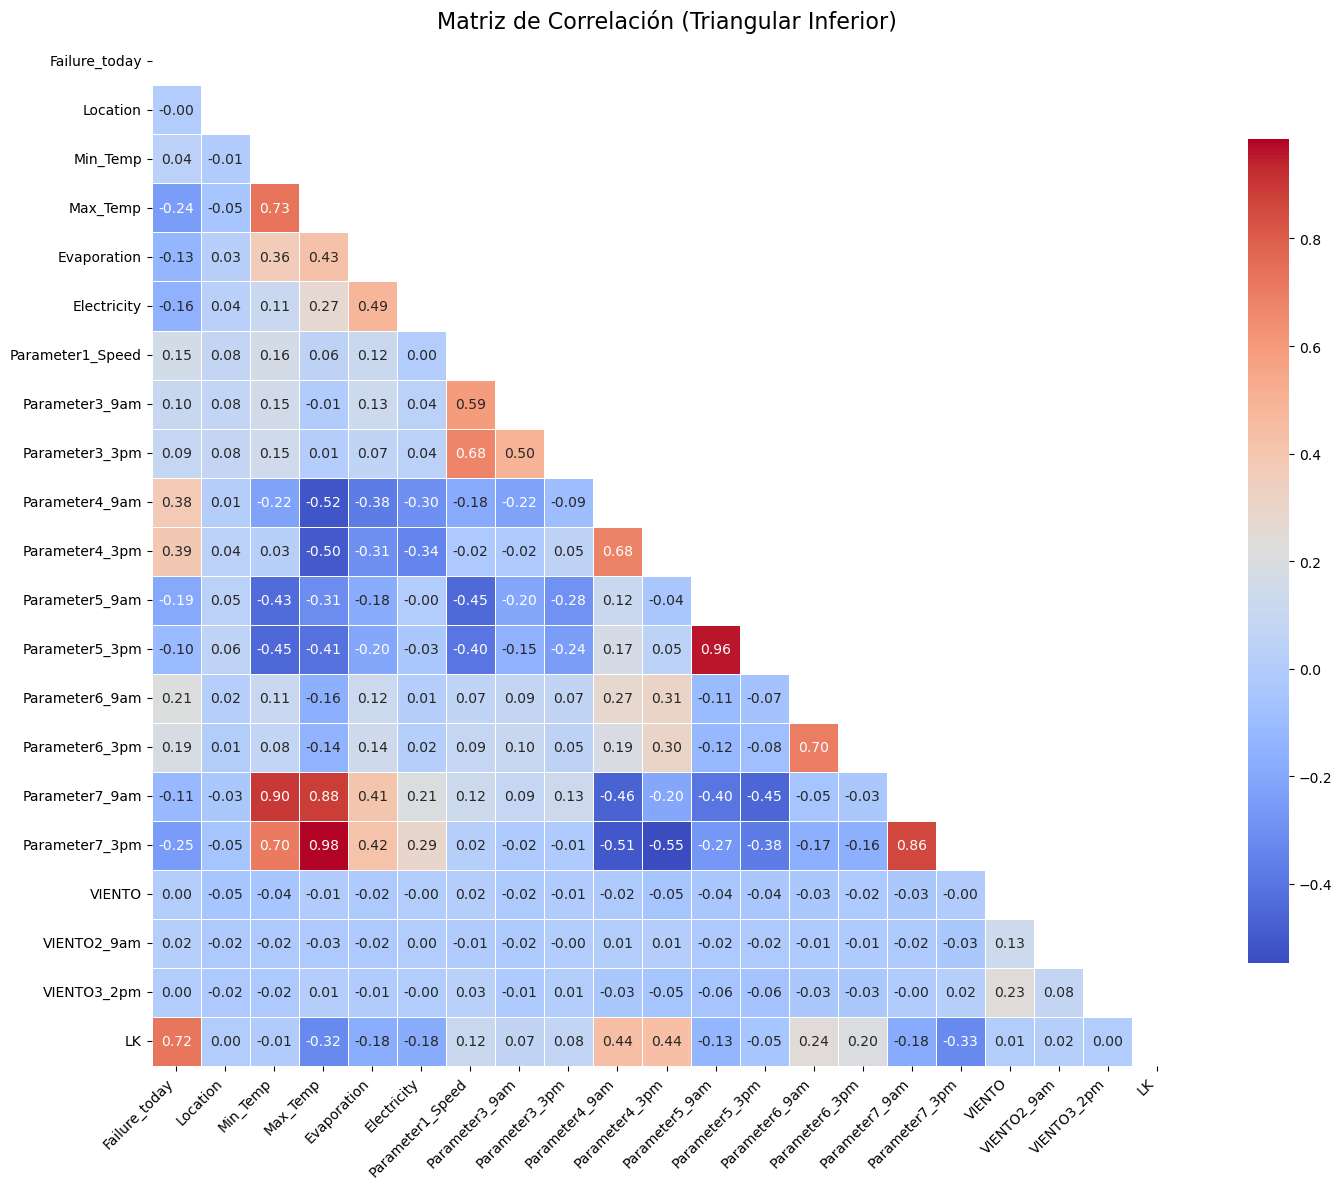

In [69]:
parametros = ['Failure_today','Location', 'Min_Temp', 'Max_Temp', 'Evaporation',
       'Electricity', 'Parameter1_Speed', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am',
       'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm', 'Parameter6_9am',
       'Parameter6_3pm', 'Parameter7_9am', 'Parameter7_3pm',
       'VIENTO', 'VIENTO2_9am', 'VIENTO3_2pm', 'LK']


df_sub = df[parametros]
corr = df_sub.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación (Triangular Inferior)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

2. Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que un dia se reporte fallo medido por sensor, a partir de las informacion disponible. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

R: Se estimó un modelo de probabilidad lineal excluyendo aquellas variables con correlaciones altas, donde la variable dependiente es 'Failure_today', la cual toma valor 1 si es que existe un fallo y 0 en caso que no. De los resultados se obtuvo un R cuadrado de 0.548, es decir, explica el 54.8% de la variabilidad. Según el modelo, la locación, la temperatura máxima, el nivel de evaporación, la electricidad y varios otros se relacionan de manera negativa, es decir, reducen la probabilidad de fallo. Aquellas variables categóricas para las direcciones del viento tienen un valor-p mayor a 0.05, por lo que no son estadísticamente significativas. Finalmente, la variable 'LK' es altamente significativa y tiene un alto impacto en la probabilidad de falla. 

In [70]:
#Regresion excluyendo variables de alta correlacion
y=df['Failure_today']
X=df.drop(['Date', 'Leakage', 'Parameter1_Dir', 'Parameter2_9am','Parameter2_3pm','Failure_today',
           'Parameter7_9am', 'Parameter7_3pm','Parameter5_3pm'], axis=1)
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Failure_today   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     5448.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:12:45   Log-Likelihood:                -16694.
No. Observations:              112925   AIC:                         3.342e+04
Df Residuals:                  112907   BIC:                         3.360e+04
Df Model:                          17                                         
Covariance Type:                  HC0                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.5273      0.172  

3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

R: Se observa que Leakage afecta significativamente a la probabilidad de falla, es decir, un aumento de esta variable aumenta la probabilidad de falla en un 88.01 puntos porcentuales. Como el modelo no convergió correctamente debido a la influencia de esta variable, se optó por  excluirla para evaluar los efectos de las demás variables.  De este segundo intento, se obtuvo un pseudo R cuadrado moderado de 0.3022 y un LLR p-value de 0.000, lo que indica que el modelo sigue siendo significativo. La mayor parte de las variables aumentaron la magnitud de sus efectos marginales manteniendo el sentido. Por ejemplo, la temperatura máxima y la evaporación disminuyen la probabilidad de falla, donde un aumento de una unidad de esas variables disminuye en 12.08 y 2.83 puntos porcentuales la probabilidad de falla. Por otro lado, la variable VIENTO3_2pm no es estadísticamente significativa, mientras que el resto de variables sí. .

In [71]:
X = df[['Location', 'Min_Temp', 'Max_Temp', 'Evaporation',
       'Electricity', 'Parameter1_Speed', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am',
       'Parameter4_3pm', 'Parameter5_9am','Parameter6_9am','Parameter6_3pm',
       'VIENTO', 'VIENTO2_9am', 'VIENTO3_2pm', 'LK']]
y = df['Failure_today']

X = sm.add_constant(X)
probit_model = sm.Probit(y, X).fit(cov_type='HC0')
print(probit_model.summary())

# Efectos marginales
mfx = probit_model.get_margeff()
print(mfx.summary())


         Current function value: 0.208440
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               112925
Model:                         Probit   Df Residuals:                   112907
Method:                           MLE   Df Model:                           17
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.6087
Time:                        20:12:56   Log-Likelihood:                -23538.
converged:                      False   LL-Null:                       -60159.
Covariance Type:                  HC0   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               17.4311      1.110     15.698      0.000      15.255      19.607
Location            -0.0005      0.000     -1.1

Se puede observar que cerca del 63% de los casos si existe filtración, entonces se produce una falla. Este es un caso de cuasi-separación perfecta, por lo que el modelo Probit no converge. Por eso, se realiza un análisis separado sin LK para conocer los efectos de las otras variables. 

In [24]:
pd.crosstab(df['LK'], df['Failure_today'], normalize='index')


Failure_today,0.0,1.0
LK,,
0,1.000000,0.000000
1,0.367971,0.632029


In [96]:
X = df[['Location', 'Min_Temp', 'Max_Temp', 'Evaporation',
       'Electricity', 'Parameter1_Speed', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am',
       'Parameter4_3pm', 'Parameter5_9am', 'Parameter6_9am','Parameter6_3pm',
       'VIENTO', 'VIENTO2_9am', 'VIENTO3_2pm']]
y = df['Failure_today']

X = sm.add_constant(X)
probit_model = sm.Probit(y, X).fit(cov_type='HC0')
print(probit_model.summary())

# Efectos marginales
mfx = probit_model.get_margeff()
print(mfx.summary())



Optimization terminated successfully.
         Current function value: 0.371758
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               112925
Model:                         Probit   Df Residuals:                   112908
Method:                           MLE   Df Model:                           16
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.3022
Time:                        22:29:48   Log-Likelihood:                -41981.
converged:                       True   LL-Null:                       -60159.
Covariance Type:                  HC0   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               30.3564      0.871     34.837      0.000      28.649      32.064
Location   

De estos resultados se puede observar un mejor ajuste de 0.371569, lo cual es moderado. 

4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

R: Al igual que el modelo Probit, Leakage sigue teniendo un efecto significativo con un efecto marginal de aproximadamente 295 puntos porcentuales. El pseudo R² es de 0.6088 y el LLR p-value  es de 0.000, lo que indica que el modelo es globalmente significativo. Al excluir 'LK' del modelo, se obtuvo un nuevo pseudo R² de 0.3107, y no se detectaron cambios significativos en las magnitudes de los efectos marginales. Se pueden interpretar algunos Odds ratios: cada grado más de temperatura mínima aumenta las probabilidades de falla en un 14.99%, mientras que cada grado más de temperatura máxima reduce las probabilidades en un 22.93% (de la fórmula (Odds - 1)x 100%). 

In [104]:
X1 = df[['Location', 'Min_Temp', 'Max_Temp', 'Evaporation',
       'Electricity', 'Parameter1_Speed', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am',
       'Parameter4_3pm', 'Parameter5_9am','Parameter6_9am','Parameter6_3pm',
       'VIENTO', 'VIENTO2_9am', 'VIENTO3_2pm', 'LK']]

y = df[['Failure_today']]
model = sm.Logit(y, X1)
logit_model = model.fit(cov_type='HC0')
print(logit_model.summary())

mfxl = logit_model.get_margeff()
print(mfxl.summary())

params = logit_model.params
conf = logit_model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['Odds Ratio', '5%', '95%']
print("Odds Ratios")
print(np.exp(conf).iloc[1:17 , ])

Optimization terminated successfully.
         Current function value: 0.208418
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               112925
Model:                          Logit   Df Residuals:                   112908
Method:                           MLE   Df Model:                           16
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.6088
Time:                        23:37:43   Log-Likelihood:                -23536.
converged:                       True   LL-Null:                       -60159.
Covariance Type:                  HC0   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Location            -0.0009      0.001     -1.126      0.260      -0.002       0.001
Min_Temp  

In [105]:
X1 = df[['Location', 'Min_Temp', 'Max_Temp', 'Evaporation',
       'Electricity', 'Parameter1_Speed', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am',
       'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm', 'Parameter6_9am',
       'Parameter6_3pm', 'Parameter7_9am', 'Parameter7_3pm',
       'VIENTO', 'VIENTO2_9am', 'VIENTO3_2pm']]
y = df[['Failure_today']]
model = sm.Logit(y, X1)
logit_model = model.fit(cov_type='HC0')
print(logit_model.summary())

mfxl = logit_model.get_margeff()
print(mfxl.summary())

params = logit_model.params
conf = logit_model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['Odds Ratio', '5%', '95%']
print("Odds Ratios")
print(np.exp(conf).iloc[1:17 , ])


Optimization terminated successfully.
         Current function value: 0.367194
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               112925
Model:                          Logit   Df Residuals:                   112906
Method:                           MLE   Df Model:                           18
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.3107
Time:                        23:38:52   Log-Likelihood:                -41465.
converged:                       True   LL-Null:                       -60159.
Covariance Type:                  HC0   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Location            -0.0052      0.001     -8.176      0.000      -0.006      -0.004
Min_Temp   

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

R: De los tres modelos se pudo observar la fuerte influencia que tienen las filtraciones en la probabilidad de fallo en los sensores. MCO no es buen modelo de especificación debido a las variables binarias, sin embargo, permite conocer las correlaciones lineales y las direcciones de influencia. En este contexto, Probit y Logit son modelos más adecuados, ya que determinan los efectos marginales sobre la probabilidad de fallo. Las diferencias identificadas son que en MCO las variables de viento no fueron estadísticamente significativas, mientras que en Probit VIENTO2_9am si lo fué y en Logit se sumó VIENTO como otra variable significativa SOLO al excluir Leakage de los modelos. En este sentido, Logit es más  adecuado debido a que tiene más variables significativas que los otros modelos y la naturaleza binaria del análisis. 

Variables robustas identificadas son algunas como Min_Temp, Max_Temp, Evaporation, Parameter6_3pm, entre otras, debido a su consistencia en los tres modelos. Esto refuerza su relevancia como predictores del fallo en los sensores.

6. Agregue la data a nivel mensual, usando la data promedio de las variables (ignorando aquellas categoricas, como la direccion del viento). En particular, genere una variable que cuente la cantidad de fallos observados en un mes, utilice un valor de 0 si en ese mes no se reporto fallos en ningun dia. Use un modelo Poisson para explicar el numero de fallas por mes. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

R: Al agregar la data a nivel mensual, excluyendo las variables categóricas, se obtuvieron un total de 4137 observaciones. El modelo Poisson mostró un pseudo R-cuadrado elevado (0.889) y convergió en solo 5 iteraciones, lo que indica buena estabilidad y ajuste. Se observaron cambios relevantes en la magnitud y dirección de algunos coeficientes respecto a modelos anteriores; por ejemplo, ahora un aumento en la temperatura máxima se asocia a un mayor riesgo de fallas, lo que contrasta con resultados previos. También cambiaron de signo variables como 'Parameter5_3pm' y 'Parameter7_3pm'. Las variables relacionadas con filtraciones, como 'LK' y 'Leakage', se mantienen como factores altamente significativos en la predicción de fallas. En cuanto a los indicadores de datos faltantes, todos resultaron significativos salvo 'I_elect', lo cual es coherente con que la variable 'Electricity' tampoco lo sea. En particular, 'I_param6_9am' mostró una fuerte asociación con menos fallas (coeficiente de -0.3168), mientras que 'I_param6_3pm' se asoció a un mayor número de fallas (coeficiente de 0.3865), lo que sugiere que la presencia o ausencia de datos en estas variables también entrega información importante sobre el comportamiento de los sensores.

In [76]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
df['Failure_today'] = df['Failure_today'].astype(int)


df_mes_sensor = df.groupby(['Location', 'Month']).agg({
    'Failure_today': 'sum',  
    'Evaporation': 'mean',
    'Electricity': 'mean',
    'Min_Temp': 'mean', 
    'Max_Temp': 'mean',
    'Parameter1_Speed': 'mean',
    'Parameter3_9am': 'mean', 
    'Parameter3_3pm': 'mean', 
    'Parameter4_9am': 'mean',
    'Parameter4_3pm': 'mean', 
    'Parameter5_9am': 'mean', 
    'Parameter5_3pm': 'mean', 
    'Parameter6_9am': 'mean',
    'Parameter6_3pm': 'mean', 
    'Parameter7_9am': 'mean', 
    'Parameter7_3pm': 'mean',
    'Leakage' : 'mean',
    'LK' : 'mean',
}).reset_index()

In [77]:
df_mes_sensor['I_evap'] = (df_mes_sensor['Evaporation'] == 0).astype(int)
df_mes_sensor['I_elect'] = (df_mes_sensor['Electricity'] == 0).astype(int)
df_mes_sensor['I_param6_9am'] = (df_mes_sensor['Parameter6_9am'] == 0).astype(int)
df_mes_sensor['I_param6_3pm'] = (df_mes_sensor['Parameter6_3pm'] == 0).astype(int)


In [79]:
df_mes_sensor.head()

,Location,Month,Failure_today,Evaporation,Electricity,Min_Temp,Max_Temp,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,...,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Leakage,LK,I_evap,I_elect,I_param6_9am,I_param6_3pm
0,1,2008-07,10,2.110000,4.485000,7.000000,14.550000,39.450000,11.950000,16.250000,...,0.0,0.0,10.795000,13.615000,3.530000,0.700000,0,0,1,1
1,1,2008-08,10,1.715789,6.147368,5.936842,14.600000,36.105263,9.315789,15.631579,...,0.0,0.0,9.973684,13.484211,4.242105,0.631579,0,0,1,1
2,1,2008-09,4,4.446154,8.588462,9.461538,20.234615,39.846154,14.730769,17.807692,...,0.0,0.0,15.188462,19.211538,0.615385,0.346154,0,0,1,1
3,1,2008-10,2,5.091667,9.145833,12.383333,25.045833,37.291667,11.875000,17.458333,...,0.0,0.0,17.933333,23.941667,0.200000,0.166667,0,0,1,1
4,1,2008-11,5,6.178571,9.064286,14.210714,24.642857,42.142857,12.607143,18.678571,...,0.0,0.0,18.492857,23.110714,0.492857,0.321429,0,0,1,1


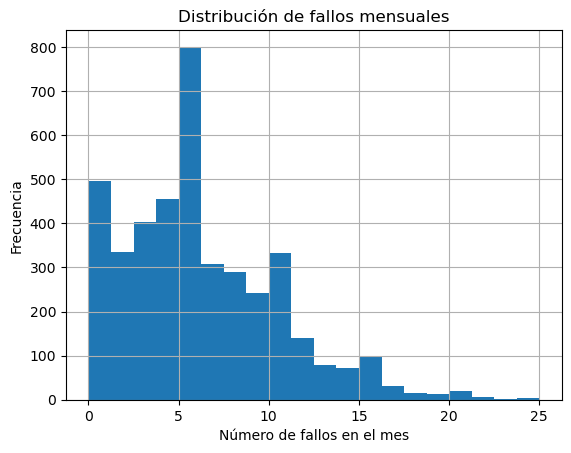

In [80]:
df_mes_sensor['Failure_today'].hist(bins=20)
plt.title("Distribución de fallos mensuales")
plt.xlabel("Número de fallos en el mes")
plt.ylabel("Frecuencia")
plt.show()


In [81]:
parametros = [
    'Min_Temp', 'Max_Temp', 'Evaporation', 'Electricity',
    'Parameter1_Speed', 'Parameter3_9am', 'Parameter3_3pm',
    'Parameter4_9am', 'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm',
    'Parameter6_9am', 'Parameter6_3pm', 'Parameter7_9am', 'Parameter7_3pm',
    'I_evap', 'I_elect', 'I_param6_9am', 'I_param6_3pm','LK','Leakage'
]

formula = 'Failure_today ~  ' + ' + '.join(parametros)
modelo_poisson = smf.glm(formula=formula, data=df_mes_sensor, family=sm.families.Poisson()).fit()
print(modelo_poisson.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          Failure_today   No. Observations:                 4137
Model:                            GLM   Df Residuals:                     4115
Model Family:                 Poisson   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8676.3
Date:                Thu, 24 Apr 2025   Deviance:                       3613.3
Time:                        20:20:08   Pearson chi2:                 3.05e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8893
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.2671      2.500  

7. Determine sobre dispersion en la data y posible valor optimo de alpha para un modelo Binomial Negativa.

R: El analisis muestra que existe una sobre dispersión de los datos. Esto se observa mejor cuando se compara la media con la varianza, donde la segunda es mucho mayor. Por otro lado, un posible valor óptimo de alpha se obtuvo como 0.9751. 

In [100]:
mean = df_mes_sensor['Failure_today'].mean()
var = df_mes_sensor['Failure_today'].var()
print("Media:", mean)
print("Varianza:", var)


Media: 6.132221416485375
Varianza: 18.016120620208767


<Axes: xlabel='plambda', ylabel='Count'>

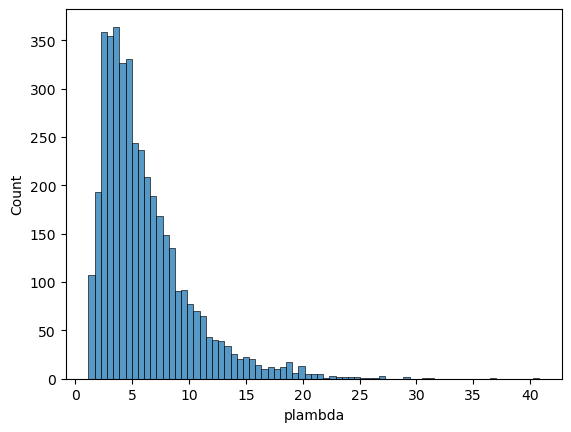

In [85]:
df_mes_sensor['plambda'] = modelo_poisson.mu
sns.histplot(data=df_mes_sensor, x="plambda")

In [101]:
y = df_mes_sensor["Failure_today"] 
mu = modelo_poisson.mu

aux = ((y - mu)**2 - mu) / mu
auxr = sm.OLS(aux, mu).fit()
print(auxr.summary())


                                 OLS Regression Results                                
Dep. Variable:          Failure_today   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):              0.030
Method:                 Least Squares   F-statistic:                              130.4
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                    9.29e-30
Time:                        23:07:28   Log-Likelihood:                         -6035.6
No. Observations:                4137   AIC:                                  1.207e+04
Df Residuals:                    4136   BIC:                                  1.208e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

El posible valor óptimo de alpha se calcula como: 

In [103]:
print(np.exp(-0.0252))

0.9751148695508249


8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder a la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

R: Se concluye que varias de las variables en el modelo Binomial Negativo son estadísticamente significativas, cumpliendo el criterio de significancia con un valor p inferior a 0.05, como 'Evaporation', 'Parameter1_Speed', entre otros. El modelo explica aproximadamente el 31.18% de la variabilidad en la variable dependiente, que es el número de fallos por sensor observados en un mes. Las variables con mayor incidencia en el número de fallos son las de filtraciones. Por ejemplo, al aumentar LK, la probabilidad de que se presenten más fallos aumenta considerablemente, lo que sugiere una fuerte relación positiva entre esta variable y el número de fallos. Asimismo, al incrementarse la temperatura máxima, también aumenta la probabilidad de que ocurran más fallos en el sistema.

In [93]:
xx = df_mes_sensor[[
    'Min_Temp', 'Max_Temp', 'Evaporation', 'Electricity',
    'Parameter1_Speed', 'Parameter3_9am', 'Parameter3_3pm',
    'Parameter4_9am', 'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm',
    'Parameter6_9am', 'Parameter6_3pm', 'Parameter7_9am', 'Parameter7_3pm',
    'I_evap', 'I_elect', 'I_param6_9am', 'I_param6_3pm', 'LK', 'Leakage'
]]

negbin=sm.GLM(y,xx,family=sm.families.NegativeBinomial(alpha=0.9493)).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Failure_today   No. Observations:                 4137
Model:                            GLM   Df Residuals:                     4116
Model Family:        NegativeBinomial   Df Model:                           20
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11136.
Date:                Thu, 24 Apr 2025   Deviance:                       950.26
Time:                        21:31:41   Pearson chi2:                     617.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3118
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Min_Temp             0.0286      0.017  

9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

R: Se pudo observar una clara sobredispersión (varianza > media), por lo que el modelo Poisson no es el más adecuado para estos datos. Es por eso que, en mi opinión, la Binomial Negativa es un modelo más apto, puesto que este permite modelar la sobredispersión de forma explícita. Así,  'Evaporation', 'Parameter1_Speed', 'Parameter4_9am', 'Parameter7_3pm' y 'LK' resultaron ser consistentes en los dos modelos.